In [7]:

import requests
import pandas as pd
import itertools
import importlib

In [8]:
import importlib
import es_ds_loader
importlib.reload(es_ds_loader)

from es_ds_loader import EurostatDataLoader


In [11]:
loader = EurostatDataLoader(cache_expiry=1800)
df = loader.load_dataset('crim_off_cat', filters={"time": ["2018"]})


(('format', 'json'), ('time', ('2018',)))
('crim_off_cat', frozenset({('time', ('2018',)), ('format', 'json')}))


The most happening crime in the EU is: Theft


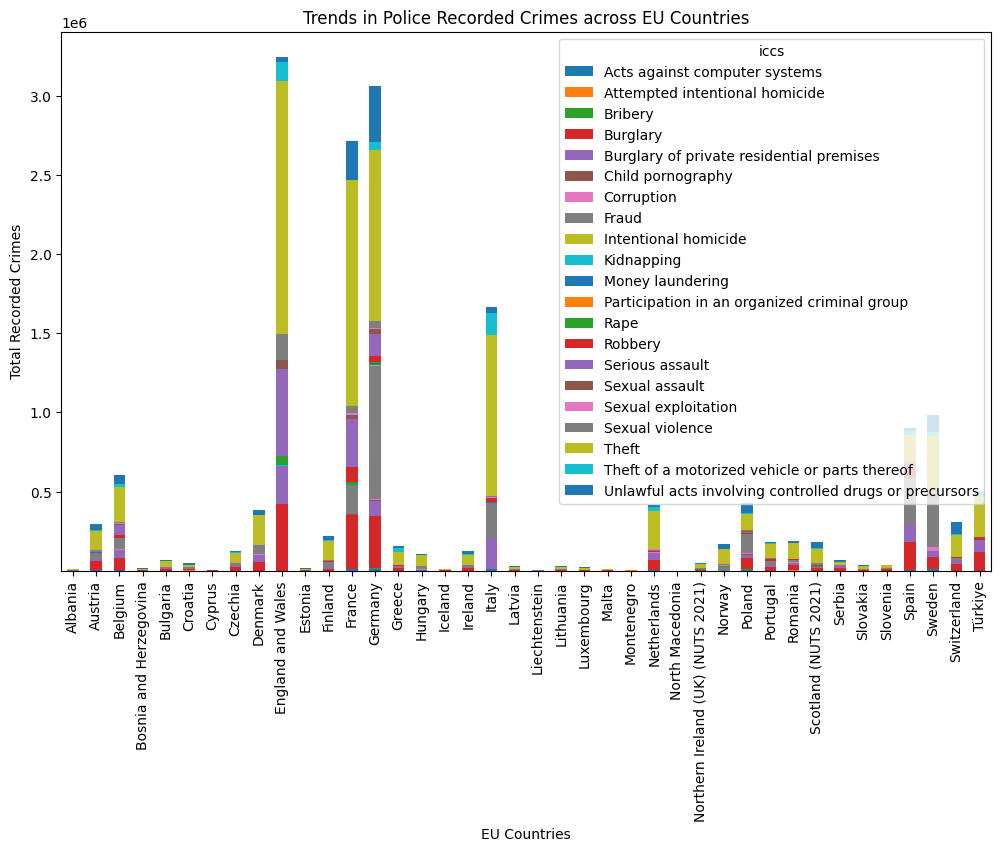

In [12]:
# Filter out Kosovo (which is not an EU member) from the analysis
eu_df = df[~df['geo'].str.contains('Kosovo')]

# Create a pivot table: each row is a EU country, each column a crime category (iccs) with total recorded crime values
pivot = eu_df.groupby(['geo', 'iccs'])['value'].sum().unstack()

# Plot as a stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(12, 7))
ax.set_xlabel('EU Countries')
ax.set_ylabel('Total Recorded Crimes')
ax.set_title('Trends in Police Recorded Crimes across EU Countries')

# Identify the crime type with the highest total in the EU
most_frequent_crime = eu_df.groupby('iccs')['value'].sum().idxmax()
print("The most happening crime in the EU is:", most_frequent_crime)